In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

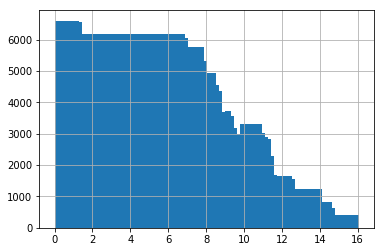

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


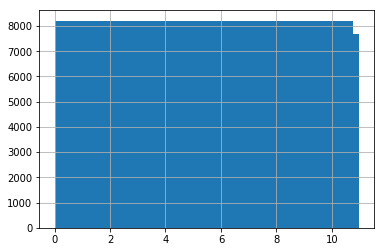

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

7

In [27]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [37]:
GNO=206
!mkdir -p input/sub/{GNO}

In [38]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/206'

In [39]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, "sub{}_q{}_a11_s{}.csv".format(GNO,qno, randseed))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [40]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=None,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[None,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [41]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'regression_l1f2',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [42]:
best_mae=1e10

In [43]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf,
          fair_c,seed):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [44]:
best={'colsample_bytree': 0.32248617809344093,
 'fair_c': 0.003974689650046167,
 'learning_rate': 0.004019833784788417,
 'max_depth': 3.002611529057542,
 'min_data_in_leaf': 379.9844816561803,
 'min_sum_hessian_in_leaf': 0.04652907684920078,
 'num_leaves': 101.39166645374301,
 'reg_alpha': 0.038868784723408725,
 'reg_lambda': 1.1075273286208651,
 'subsample': 0.9478871620798051}

In [45]:
scores=[]
for _ in range(5):
    randseed=np.random.randint(low=1, high=11111111)
    print 'seed',randseed
    best['seed']=randseed
    a=lgbcv(**best)
    scores.append(a)

seed 10009183
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.19794	valid_1's l1: 1.34629
[200]	training's l1: 1.08808	valid_1's l1: 1.26243
[300]	training's l1: 1.05596	valid_1's l1: 1.2361
[400]	training's l1: 1.03301	valid_1's l1: 1.22582
[500]	training's l1: 1.01297	valid_1's l1: 1.22694
Early stopping, best iteration is:
[427]	training's l1: 1.02774	valid_1's l1: 1.22499
write to /home/hadoop/lanlep2019/input/sub/206/sub206_q1_a11_s10009183.csv
quake  1 (1.224994169335579, 427)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.18681	valid_1's l1: 1.40953
[200]	training's l1: 1.08004	valid_1's l1: 1.33663
[300]	training's l1: 1.0476	valid_1's l1: 1.31888
[400]	training's l1: 1.02484	valid_1's l1: 1.31593
Early stopping, best iteration is:
[376]	training's l1: 1.03042	valid_1's l1: 1.31411
wr

(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.21924	valid_1's l1: 1.13943
[200]	training's l1: 1.10217	valid_1's l1: 1.14026
Early stopping, best iteration is:
[118]	training's l1: 1.18169	valid_1's l1: 1.13239
write to /home/hadoop/lanlep2019/input/sub/206/sub206_q15_a11_s10009183.csv
quake  15 (1.1323929555232108, 118)
mean score 1.1491119049999947
seed 5941664
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.1998	valid_1's l1: 1.33841
[200]	training's l1: 1.09065	valid_1's l1: 1.25196
[300]	training's l1: 1.05772	valid_1's l1: 1.22968
[400]	training's l1: 1.03549	valid_1's l1: 1.22092
[500]	training's l1: 1.01402	valid_1's l1: 1.21961
Early stopping, best iteration is:
[463]	training's l1: 1.02209	valid_1's l1: 1.21774
write to /home/hadoop/lanlep2019/input/sub/206/sub206_q1_a11_s5941664.csv
quake  1 (1

(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.17893	valid_1's l1: 1.49533
[200]	training's l1: 1.07171	valid_1's l1: 1.4278
[300]	training's l1: 1.03719	valid_1's l1: 1.43038
Early stopping, best iteration is:
[229]	training's l1: 1.05919	valid_1's l1: 1.42606
write to /home/hadoop/lanlep2019/input/sub/206/sub206_q14_a11_s5941664.csv
quake  14 (1.4260616670216812, 229)
valid quake 15
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.2191	valid_1's l1: 1.13307
[200]	training's l1: 1.10293	valid_1's l1: 1.12861
Early stopping, best iteration is:
[104]	training's l1: 1.20989	valid_1's l1: 1.12658
write to /home/hadoop/lanlep2019/input/sub/206/sub206_q15_a11_s5941664.csv
quake  15 (1.1265810824756493, 104)
mean score 1.1492191510530965
seed 10123750
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
Training until v

[100]	training's l1: 1.21344	valid_1's l1: 1.23889
[200]	training's l1: 1.10205	valid_1's l1: 1.10827
[300]	training's l1: 1.06843	valid_1's l1: 1.0744
[400]	training's l1: 1.04524	valid_1's l1: 1.0616
[500]	training's l1: 1.0258	valid_1's l1: 1.0588
[600]	training's l1: 1.00868	valid_1's l1: 1.05661
Early stopping, best iteration is:
[561]	training's l1: 1.01469	valid_1's l1: 1.05595
write to /home/hadoop/lanlep2019/input/sub/206/sub206_q13_a11_s10123750.csv
quake  13 (1.0559470214604012, 561)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.18019	valid_1's l1: 1.49621
[200]	training's l1: 1.07263	valid_1's l1: 1.42982
[300]	training's l1: 1.03798	valid_1's l1: 1.42726
[400]	training's l1: 1.01349	valid_1's l1: 1.42774
Early stopping, best iteration is:
[365]	training's l1: 1.02164	valid_1's l1: 1.42577
write to /home/hadoop/lanlep2019/input/sub/206/sub206_q14_a11_s10123750.csv
quake  14 

(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.21968	valid_1's l1: 1.09215
[200]	training's l1: 1.10718	valid_1's l1: 0.97491
[300]	training's l1: 1.07471	valid_1's l1: 0.942819
[400]	training's l1: 1.05175	valid_1's l1: 0.931424
[500]	training's l1: 1.03249	valid_1's l1: 0.927691
[600]	training's l1: 1.01645	valid_1's l1: 0.924491
[700]	training's l1: 1.00178	valid_1's l1: 0.927341
Early stopping, best iteration is:
[600]	training's l1: 1.01645	valid_1's l1: 0.924491
write to /home/hadoop/lanlep2019/input/sub/206/sub206_q12_a11_s4176008.csv
quake  12 (0.9244914083920055, 600)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.21225	valid_1's l1: 1.23746
[200]	training's l1: 1.1022	valid_1's l1: 1.10039
[300]	training's l1: 1.06878	valid_1's l1: 1.07003
[400]	training's l1: 1.04744	valid_1's l1: 1.06014
[500

[100]	training's l1: 1.2233	valid_1's l1: 1.07591
[200]	training's l1: 1.10844	valid_1's l1: 1.00057
[300]	training's l1: 1.07463	valid_1's l1: 0.998245
[400]	training's l1: 1.05231	valid_1's l1: 0.992854
[500]	training's l1: 1.03272	valid_1's l1: 0.994506
Early stopping, best iteration is:
[401]	training's l1: 1.05209	valid_1's l1: 0.992643
write to /home/hadoop/lanlep2019/input/sub/206/sub206_q11_a11_s828630.csv
quake  11 (0.9926426617724581, 401)
valid quake 12
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.2207	valid_1's l1: 1.08307
[200]	training's l1: 1.10763	valid_1's l1: 0.97068
[300]	training's l1: 1.07464	valid_1's l1: 0.942008
[400]	training's l1: 1.05115	valid_1's l1: 0.930364
[500]	training's l1: 1.03191	valid_1's l1: 0.928964
[600]	training's l1: 1.01531	valid_1's l1: 0.928683
Early stopping, best iteration is:
[592]	training's l1: 1.0168	valid_1's l1: 0.927001
write to /home/hadoop/lanle

In [46]:
scores,np.mean(scores)

([1.1491119049999947,
  1.1492191510530965,
  1.1467253253452838,
  1.147296063579325,
  1.148929761363491],
 1.1482564412682383)

In [47]:
files= !ls /mnt/lanlep2019/input/sub/206/sub206*
len(files)

75

In [48]:
b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]

In [49]:
b.head()

sub206_q10_a11_s10009183  sub206_q10_a11_s10123750  \
seg_id                                                           
seg_05a1b0                  3.966876                  3.957420   
seg_f0181d                  3.954805                  4.003071   
seg_5b7325                  3.358761                  3.339095   
seg_c6b514                  2.935370                  2.878615   
seg_52c139                  9.896075                  9.935788   

            sub206_q10_a11_s4176008  sub206_q10_a11_s5941664  \
seg_id                                                         
seg_05a1b0                 3.870420                 3.914468   
seg_f0181d                 3.956459                 4.004865   
seg_5b7325                 3.473383                 3.389152   
seg_c6b514                 2.956767                 2.995944   
seg_52c139                10.078914                 9.963627   

            sub206_q10_a11_s828630  sub206_q11_a11_s10009183  \
seg_id                                                         
seg_05a1b0                3.764269                  3.852349   
seg_f0181d                4.011584                  3.988512   
seg_5b7325                3.391787                  3.454365   
seg_c6b514                2.844406                  2.917370   
seg_52c139               10.102660                 10.152658   

            sub206_q11_a11_s10123750  sub206_q11_a11_s4176008  \
seg_id                                                          
seg_05a1b0                  3.885625                 3.956775   
seg_f0181d                  3.919284                 3.989650   
seg_5b7325                  3.412347                 3.528143   
seg_c6b514                  2.837317                 2.860925   
seg_52c139                 10.035031                10.072457   

            sub206_q11_a11_s5941664  sub206_q11_a11_s828630  \
seg_id                                                        
seg_05a1b0                 3.775703                3.809604   
seg_f0181d                 3.871457                3.974668   
seg_5b7325                 3.387583                3.459244   
seg_c6b514                 2.828896                2.796850   
seg_52c139                10.100484               10.250670   

                    ...            sub206_q8_a11_s10009183  \
seg_id              ...                                      
seg_05a1b0          ...                           3.834295   
seg_f0181d          ...                           3.855138   
seg_5b7325          ...                           3.474969   
seg_c6b514          ...                           2.944025   
seg_52c139          ...                           9.845985   

            sub206_q8_a11_s10123750  sub206_q8_a11_s4176008  \
seg_id                                                        
seg_05a1b0                 3.860166                3.896387   
seg_f0181d                 3.905845                3.935597   
seg_5b7325                 3.610906                3.633549   
seg_c6b514                 2.941783                2.908579   
seg_52c139                10.061575               10.082564   

            sub206_q8_a11_s5941664  sub206_q8_a11_s828630  \
seg_id                                                      
seg_05a1b0                3.876739               3.864187   
seg_f0181d                3.979693               3.951076   
seg_5b7325                3.597912               3.554864   
seg_c6b514                2.946006               2.883545   
seg_52c139               10.016095              10.023395   

            sub206_q9_a11_s10009183  sub206_q9_a11_s10123750  \
seg_id                                                         
seg_05a1b0                 3.896120                 3.931353   
seg_f0181d                 4.032009                 3.930292   
seg_5b7325                 3.470545                 3.539128   
seg_c6b514                 2.730417                 2.864044   
seg_52c139                10.096822                10.048912   


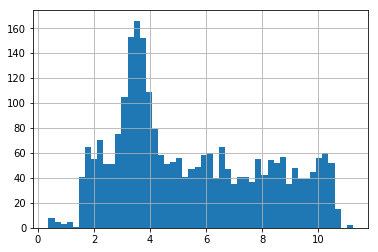

In [50]:
b.mean(1).hist(bins=50);

In [51]:
(b.mean(1)>9.75).sum() 

224

In [52]:
np.abs(b.median(1)-b.mean(1)).mean()

0.018263944128294053

In [53]:
b.mean(1).mean(),b.median(1).mean()

(5.448347683739318, 5.442066713718137)

In [54]:
p=b.mean(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub206_a11.csv".format('mean'))
p.to_csv(fname,index=None)

In [55]:
p=b.median(1).to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, "{}_sub206_a11.csv".format('median'))
p.to_csv(fname,index=None)